<a href="https://colab.research.google.com/github/BonnieChester/GSM-KU-Workshop/blob/main/WS_data_analysis_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# 读取数据
file_path = '/content/drive/My Drive/WS/Summary by 6 facets_for analysis.xlsx'  # 修改为你的文件路径
data = pd.read_excel(file_path)

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 特征列
X = data[['Intrapersonal', 'Artistic', 'Interactive', 'Intrinsic', 'Interpersonal', 'Mechanical']]

# 目标列<ctrl3
y = data['Positive rate']

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林回归模型
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 拟合模型
rf_regressor.fit(X_train, y_train)

# 进行预测
predictions = rf_regressor.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # 计算均方根误差

print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MSE: 0.0085215752
R²: -0.04361494297919033
MAE: 0.07470399999999996
RMSE: 0.09231237836823401


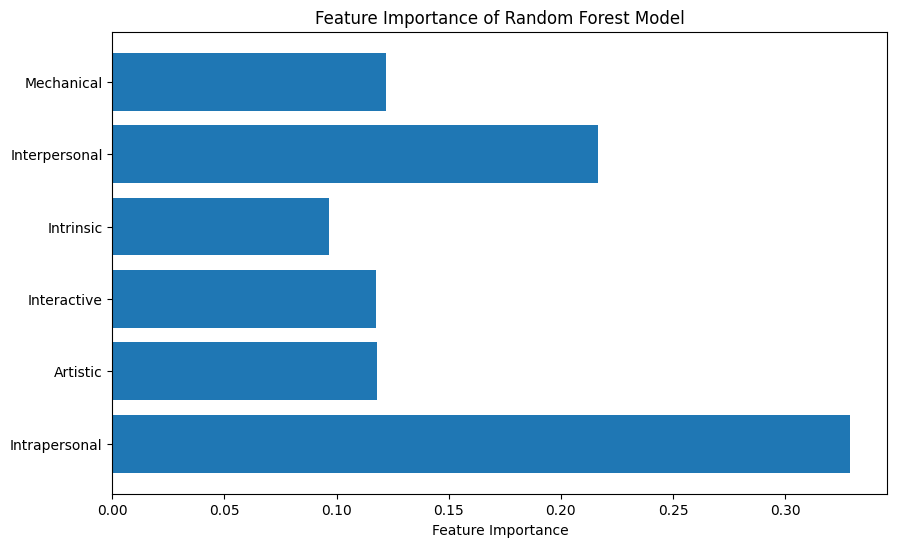

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # 或者是 RandomForestRegressor，根据你的模型类型来选择

# 假设你的模型名为 rf_model，这是一个已经拟合好的随机森林模型
feature_importance = rf_regressor.feature_importances_
feature_names = ['Intrapersonal', 'Artistic', 'Interactive', 'Intrinsic', 'Interpersonal', 'Mechanical']  # 替换成你的特征名称列表

# 创建特征重要性的条形图
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Random Forest Model')
plt.show()

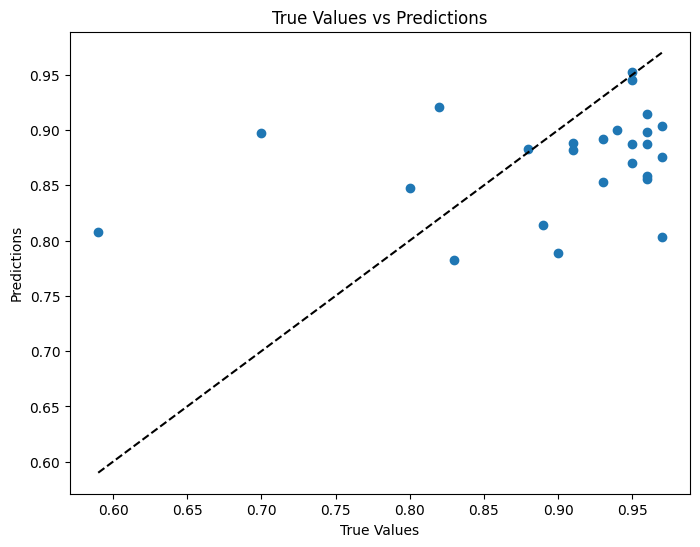

In [ ]:
true_values = y_test

plt.figure(figsize=(8, 6))
plt.scatter(true_values, predictions)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], '--k')  # 对角线
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()